<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## IA (Inteligência Artificial) e ML (Machine Learning - Aprendizagem de Máquina) com Scikit-learn

Continuação...

Mais sobre IA ML cluster com Scikit-learn...

### LAB

Carregando as LIBs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

Carregando os dados, json, do GitHub

Dados de decisões da corte, vamos usar apenas **x** e **y**, dados ofuscados:

In [35]:
court_df = pd.DataFrame(requests.get("https://github.com/danielscarvalho/data/blob/master/CourtSentencesSyntheticData.json?raw=True").json())

In [36]:
court_df

,x,y,status
0,110.909180,434.302500,approved
1,79.792281,411.292158,approved
2,96.804140,421.942312,approved
3,26.595526,399.128440,approved
4,97.956408,414.678523,approved
...,...,...,...
970,652.269749,180.810654,pending
971,667.529416,170.291978,pending
972,683.567651,199.998180,pending
973,727.164774,210.043420,pending


In [37]:
court_df = court_df[["x","y"]]

In [38]:
court_df

,x,y
0,110.909180,434.302500
1,79.792281,411.292158
2,96.804140,421.942312
3,26.595526,399.128440
4,97.956408,414.678523
...,...,...
970,652.269749,180.810654
971,667.529416,170.291978
972,683.567651,199.998180
973,727.164774,210.043420


Visualizando os dados em um gráfico scatter 2D:

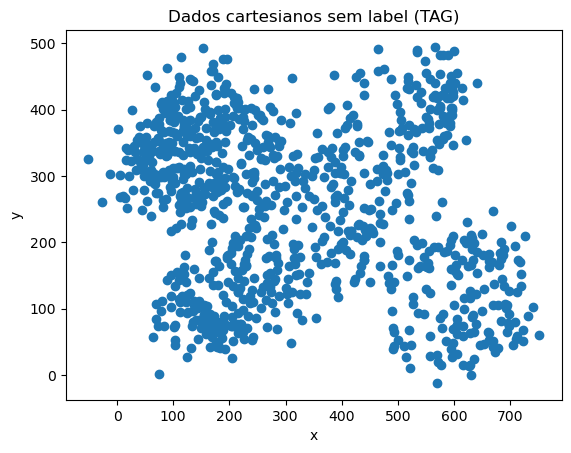

In [57]:
plt.title("Dados cartesianos sem label (TAG)")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(court_df.x,
            court_df.y)
plt.show()

### Scikit-learn modelo cluster AffinityPropagation

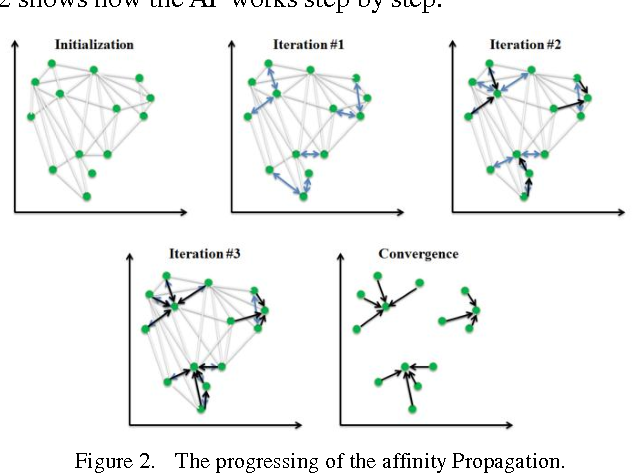

https://www.semanticscholar.org/paper/Map-Reduce-Affinity-Propagation-Clustering-Hung-Chu/d86177fc603f3807495bc0a59cfe364e99a71863

In [14]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [80]:
#af_model = AffinityPropagation(preference=-50, random_state=0)
af_model = AffinityPropagation(damping = 0.9, max_iter = 1000, random_state=0)

af_model.fit(court_df)

cluster_centers_indices = af_model.cluster_centers_indices_
cluster_labels = af_model.labels_

In [81]:
af_model.labels_

array([ 0,  0,  0,  2,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  2,  3,  2,  2,  2,  3,  2,  2,  3,  2,  2,  2,  2,  2,  0,
        2,  2,  2,  0,  0,  3,  0,  0,  2,  5,  0,  0,  0,  0,  0,  2,  1,
        1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  2,  0,  2,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  2,  0,  1,  0,  0,  1,  1,  1,  5,  5,
        1,  1,  5,  0,  4,  1,  5,  1,  4,  1,  4,  1,  4,  4,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  2,  0,  2,  2,  2,  2,  2,  0,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  3,  3,  2,  5,  3,  3,  3,  3,  3,  3,  3,  5,
        5,  5,  3,  5,  3,  5,  5,  5,  5,  5,  5,  5,  5,  0,  5,  5,  3,
        5,  5,  5,  0,  0,  5,  0,  1,  0,  0,  0,  0,  0,  3,  2,  0,  0,
        0,  3,  2,  2,  3,  2,  3,  3,  2,  3,  2,  2,  2,  3,  3,  2,  2,
        3,  2,  3,  3,  3

In [103]:
np.column_stack(np.unique(af_model.labels_, return_counts=True))

array([[ 0, 73],
       [ 1, 56],
       [ 2, 79],
       [ 3, 53],
       [ 4, 40],
       [ 5, 53],
       [ 6, 44],
       [ 7, 34],
       [ 8, 43],
       [ 9, 62],
       [10, 20],
       [11, 45],
       [12, 46],
       [13, 35],
       [14, 44],
       [15, 47],
       [16, 42],
       [17, 28],
       [18, 36],
       [19, 32],
       [20, 47],
       [21, 16]])

In [105]:
len(_)

22

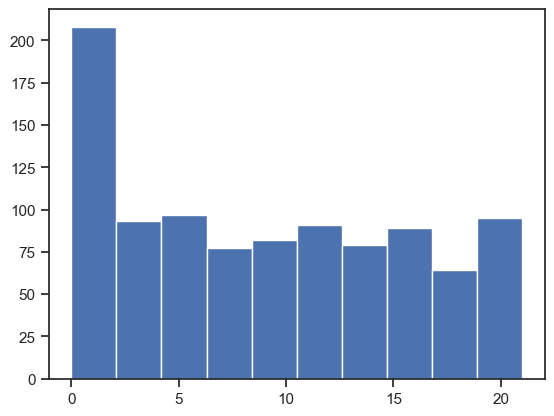

In [97]:
plt.hist(af_model.labels_)
plt.show()

In [42]:
court_df["cluster_label"] = af_model.labels_

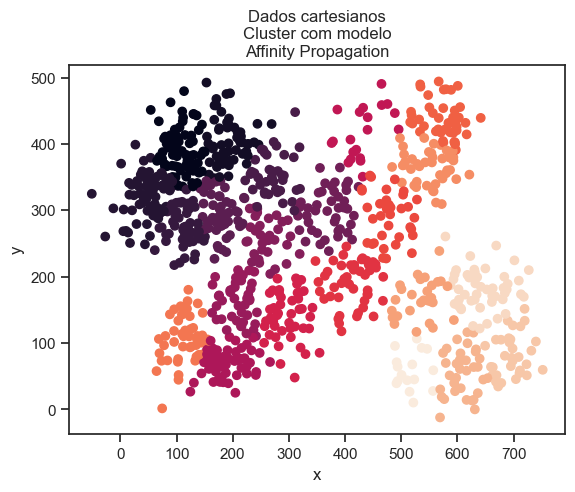

In [126]:
plt.title("Dados cartesianos\nCluster com modelo\nAffinity Propagation")
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(court_df.x,
            court_df.y,
            c = court_df.cluster_label)

plt.show()

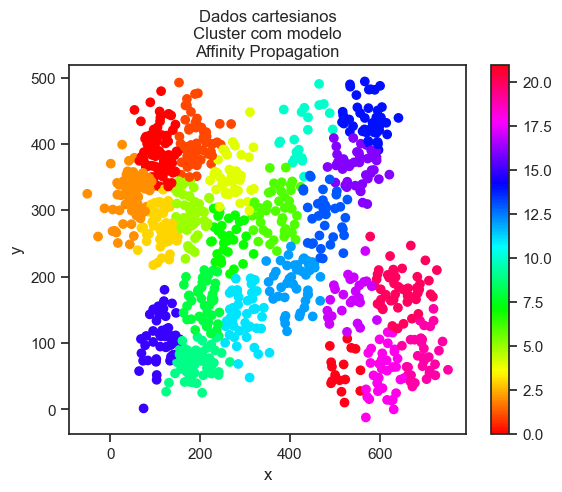

In [125]:
plt.title("Dados cartesianos\nCluster com modelo\nAffinity Propagation")
plt.xlabel("x")
plt.ylabel("y")

g = plt.scatter(court_df.x,
            court_df.y,
            c = court_df.cluster_label,
            cmap = 'hsv')
plt.colorbar(g)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='y'>

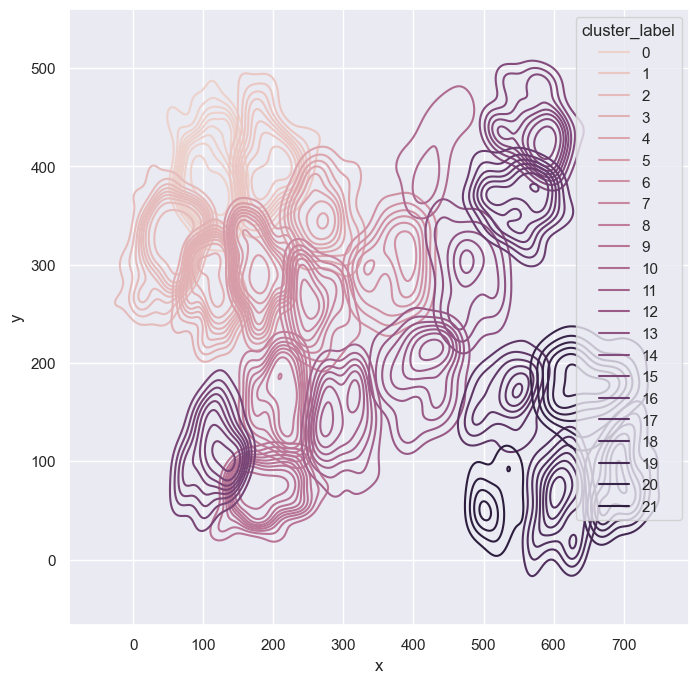

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data = court_df,
    x = "x",
    y = "y",
    hue = "cluster_label",
    thresh = .1,
)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


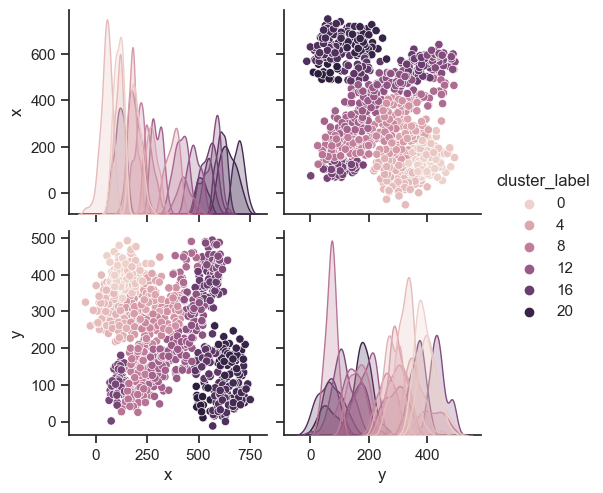

In [83]:
import seaborn as sns

sns.set_theme(style="ticks")

sns.pairplot(court_df, hue="cluster_label")

### Scikit-learn modelo cluster MiniBatchKMeans

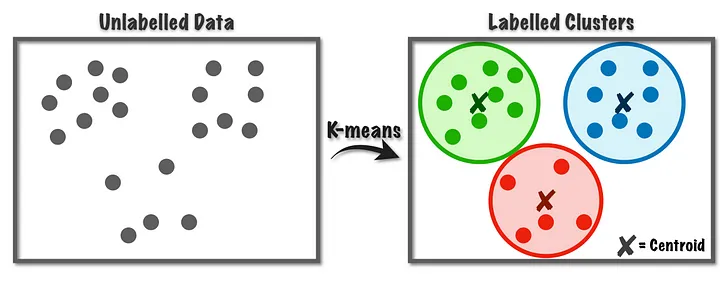

https://medium.com/@msf20118/mini-batch-g-means-a-solution-for-finding-k-in-k-means-a50342ffb07b

In [108]:
from sklearn.cluster import MiniBatchKMeans
import time

batch_size = 45

mbk_model = MiniBatchKMeans(
    init="k-means++",
    n_clusters=3,
    batch_size=batch_size,
    n_init=10,
    max_no_improvement=10,
    verbose=0,
)

t0 = time.time()

mbk_model.fit(court_df)
t_mini_batch = time.time() - t0

t_mini_batch

0.10960793495178223

Note que o **fit** (treinamento) tem apenas um parametro...

```
Signature: mbk_model.fit(X, y=None, sample_weight=None)
Docstring:
Compute the centroids on X by chunking it into mini-batches.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training instances to cluster. It must be noted that the data
    will be converted to C ordering, which will cause a memory copy
    if the given data is not C-contiguous.
    If a sparse matrix is passed, a copy will be made if it's not in
    CSR format.

y : Ignored
    Not used, present here for API consistency by convention.

...
```

In [95]:
mbk_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [104]:
np.column_stack(np.unique(mbk_model.labels_, return_counts=True))

array([[  0, 367],
       [  1, 355],
       [  2, 253]])

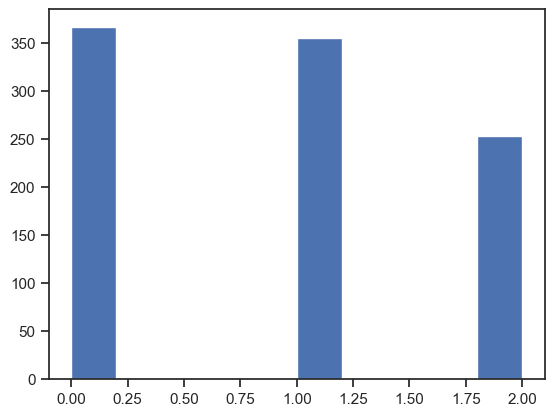

In [98]:
plt.hist(mbk_model.labels_)
plt.show()

In [90]:
court_df["mbk_cluster_label"] = mbk_model.labels_

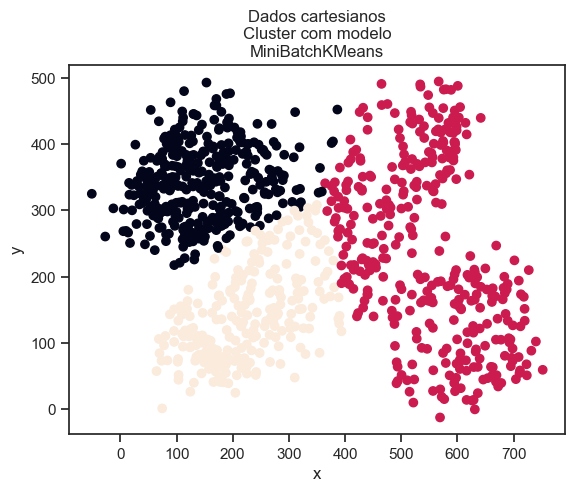

In [118]:
plt.title("Dados cartesianos\nCluster com modelo\nMiniBatchKMeans")
plt.xlabel("x")
plt.ylabel("y")
scatter = plt.scatter(court_df.x,
            court_df.y,
            c = court_df.mbk_cluster_label)
plt.show()

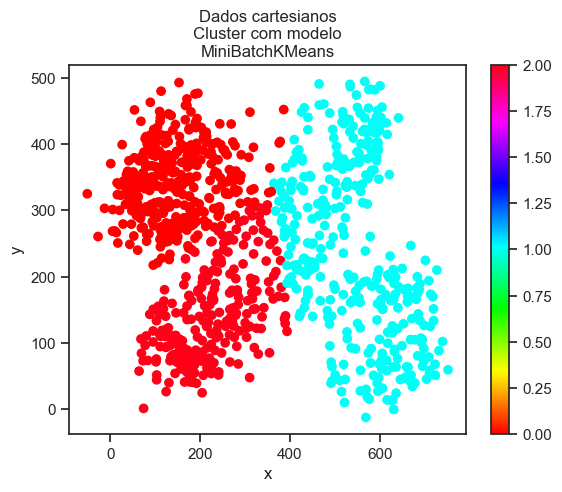

In [117]:
plt.title("Dados cartesianos\nCluster com modelo\nMiniBatchKMeans")
plt.xlabel("x")
plt.ylabel("y")
scatter = plt.scatter(court_df.x,
            court_df.y,
            c = court_df.mbk_cluster_label,
            cmap = 'hsv')
plt.colorbar(scatter)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='y'>

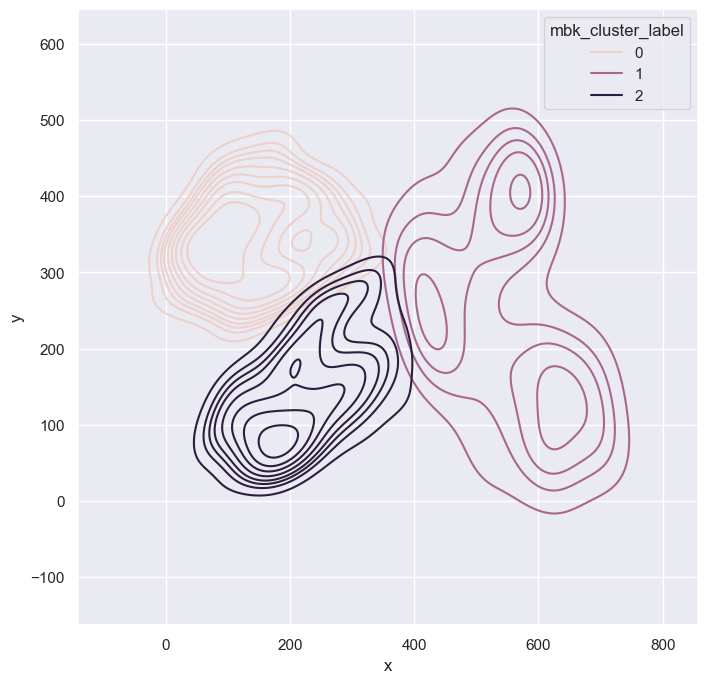

In [93]:
sns.set_theme(style="darkgrid")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data = court_df,
    x = "x",
    y = "y",
    hue = "mbk_cluster_label",
    thresh = .1,
)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


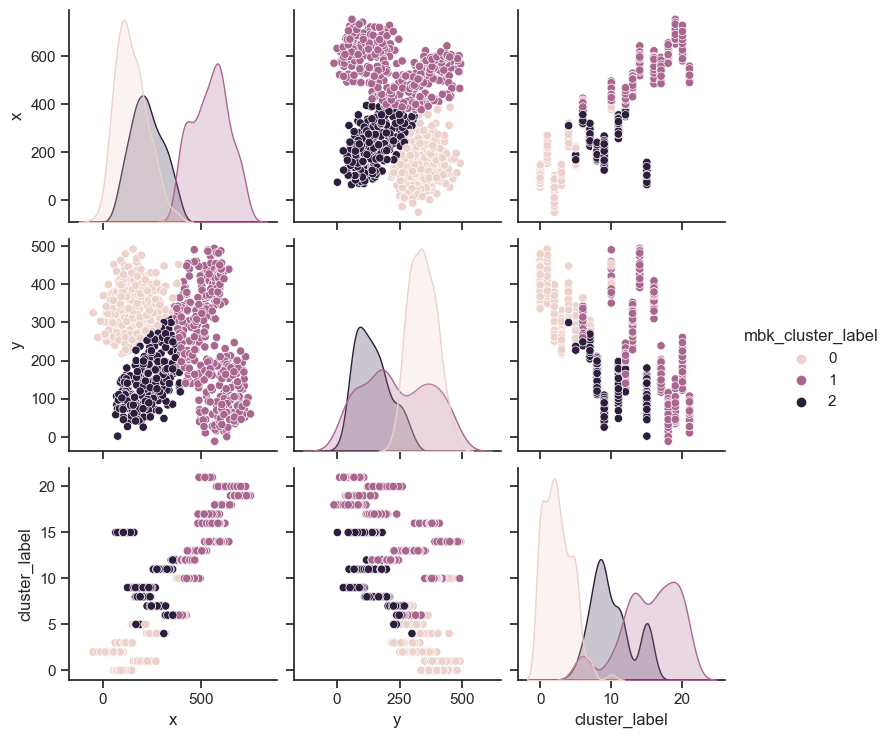

In [94]:
sns.set_theme(style="ticks")

sns.pairplot(court_df, hue="mbk_cluster_label")

In [96]:
court_df

,x,y,cluster_label,mbk_cluster_label
0,110.909180,434.302500,0,0
1,79.792281,411.292158,0,0
2,96.804140,421.942312,0,0
3,26.595526,399.128440,2,0
4,97.956408,414.678523,0,0
...,...,...,...,...
970,652.269749,180.810654,20,1
971,667.529416,170.291978,20,1
972,683.567651,199.998180,20,1
973,727.164774,210.043420,20,1


Comparando histograma dos dois modelos de cluster do Scikit-learn

<Axes: >

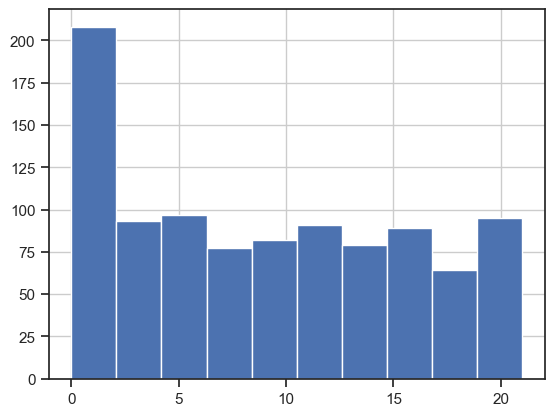

In [99]:
court_df.cluster_label.hist()

<Axes: >

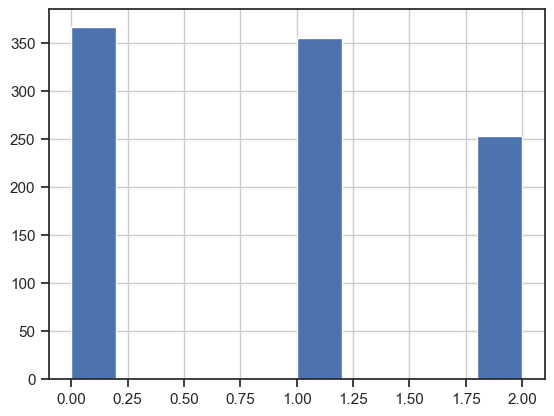

In [100]:
court_df.mbk_cluster_label.hist()

### Outros modelos (algoritmos) de cluster do Scikit-learn:

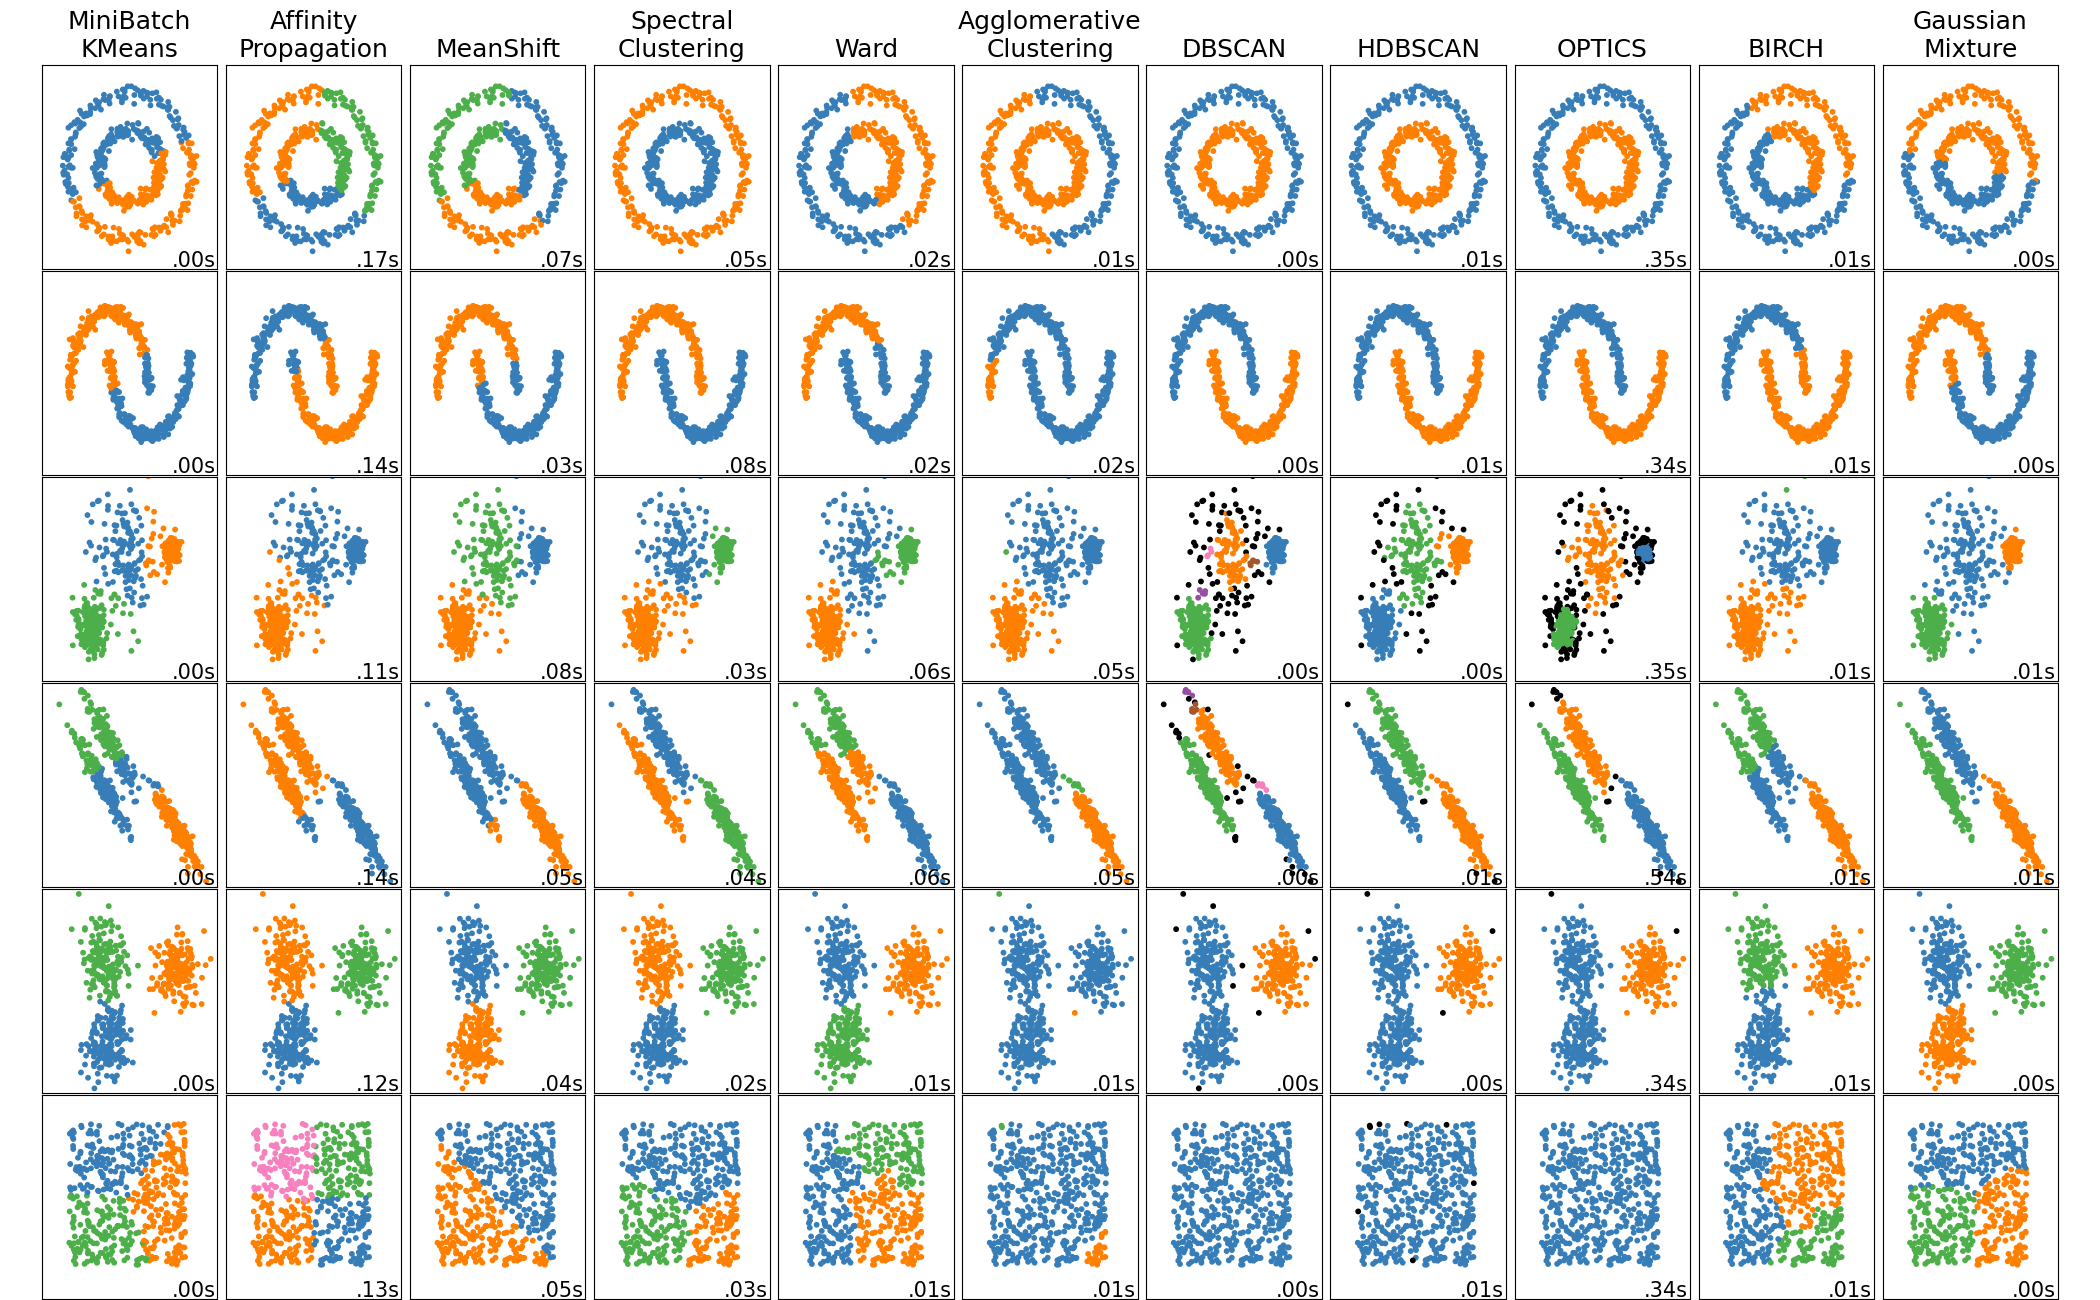

https://scikit-learn.org/1.5/auto_examples/cluster/plot_cluster_comparison.html

### Reference:

- https://scikit-learn.org/1.5/auto_examples/cluster/plot_affinity_propagation.html#sphx-glr-auto-examples-cluster-plot-affinity-propagation-py
- https://scikit-learn.org/1.5/modules/clustering.html
- https://www.w3schools.com/datascience/default.asp
- https://jakevdp.github.io/PythonDataScienceHandbook/